In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/shakthimaha/Downloads/Dataset/LBSM_All_London.csv')

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_5944/2164135893.py:1: DtypeWarning: Columns (22,23,26,28,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/shakthimaha/Downloads/Dataset/LBSM_All_London.csv')


In [16]:
columns_to_extract = [
    "EPC_RATING_COUNT_DOM", "EPC_RATING_COUNT_NONDOM", 
    "AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT", 
    "AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT",
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT", 
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT",
    "UPRN", "SCU_ID", "OA", "LSOA", "MSOA", "OAC", 
    "WARD_CODE", "WARD", "ADMINISTRATIVE_AREA"
]

df_selected = df[columns_to_extract].copy()

df_selected.rename(columns={
    "EPC_RATING_COUNT_DOM": "Domestic_EPC_Count",
    "EPC_RATING_COUNT_NONDOM": "NonDomestic_EPC_Count",
    "AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT": "Potential_Energy_Efficiency",
    "AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT" : "Potential_Energy_Efficiency_Rating",
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT": "Revised_Energy_Efficiency",
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT": "Revised_Energy_Efficiency_Rating",
    "UPRN": "Unique_Property_Reference_Number",
    "SCU_ID": "Statistical_Unit_ID",
    "OA": "Output_Area",
    "LSOA": "Lower_Super_Output_Area",
    "MSOA": "Middle_Super_Output_Area",
    "OAC": "Output_Area_Classification",
    "WARD_CODE": "Ward_Code",
    "WARD": "Ward_Name",
    "ADMINISTRATIVE_AREA": "Administrative_Area"
}, inplace=True)

df_selected.head()

,Domestic_EPC_Count,NonDomestic_EPC_Count,Potential_Energy_Efficiency,Potential_Energy_Efficiency_Rating,Revised_Energy_Efficiency,Revised_Energy_Efficiency_Rating,Unique_Property_Reference_Number,Statistical_Unit_ID,Output_Area,Lower_Super_Output_Area,Middle_Super_Output_Area,Output_Area_Classification,Ward_Code,Ward_Name,Administrative_Area
0,0,0,NaN,NaN,54.0,E,95510923,5.030100e+13,E00000010,E01000003,E02000001,2D3,E05009302,Cripplegate,CITY OF LONDON
1,0,0,NaN,NaN,54.0,E,100023615843,5.030100e+13,E00000010,E01000003,E02000001,2D3,E05009302,Cripplegate,CITY OF LONDON
2,38,0,71.0,C,63.0,D,200000071748,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON
3,38,0,71.0,C,63.0,D,200000071808,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON
4,38,0,71.0,C,63.0,D,200000071807,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON


In [17]:
df_selected = df_selected.drop_duplicates()

In [18]:
null_percentage = (df_selected.isnull().sum() / len(df_selected)) * 100
print(null_percentage)

Domestic_EPC_Count                     0.000000
NonDomestic_EPC_Count                  0.000000
Potential_Energy_Efficiency           48.029959
Potential_Energy_Efficiency_Rating    48.029959
Revised_Energy_Efficiency             14.901178
Revised_Energy_Efficiency_Rating      14.901178
Unique_Property_Reference_Number       0.000000
Statistical_Unit_ID                   10.859991
Output_Area                            0.096753
Lower_Super_Output_Area                0.096753
Middle_Super_Output_Area               0.096753
Output_Area_Classification             0.096753
Ward_Code                              0.096753
Ward_Name                              0.096753
Administrative_Area                    0.000000
dtype: float64


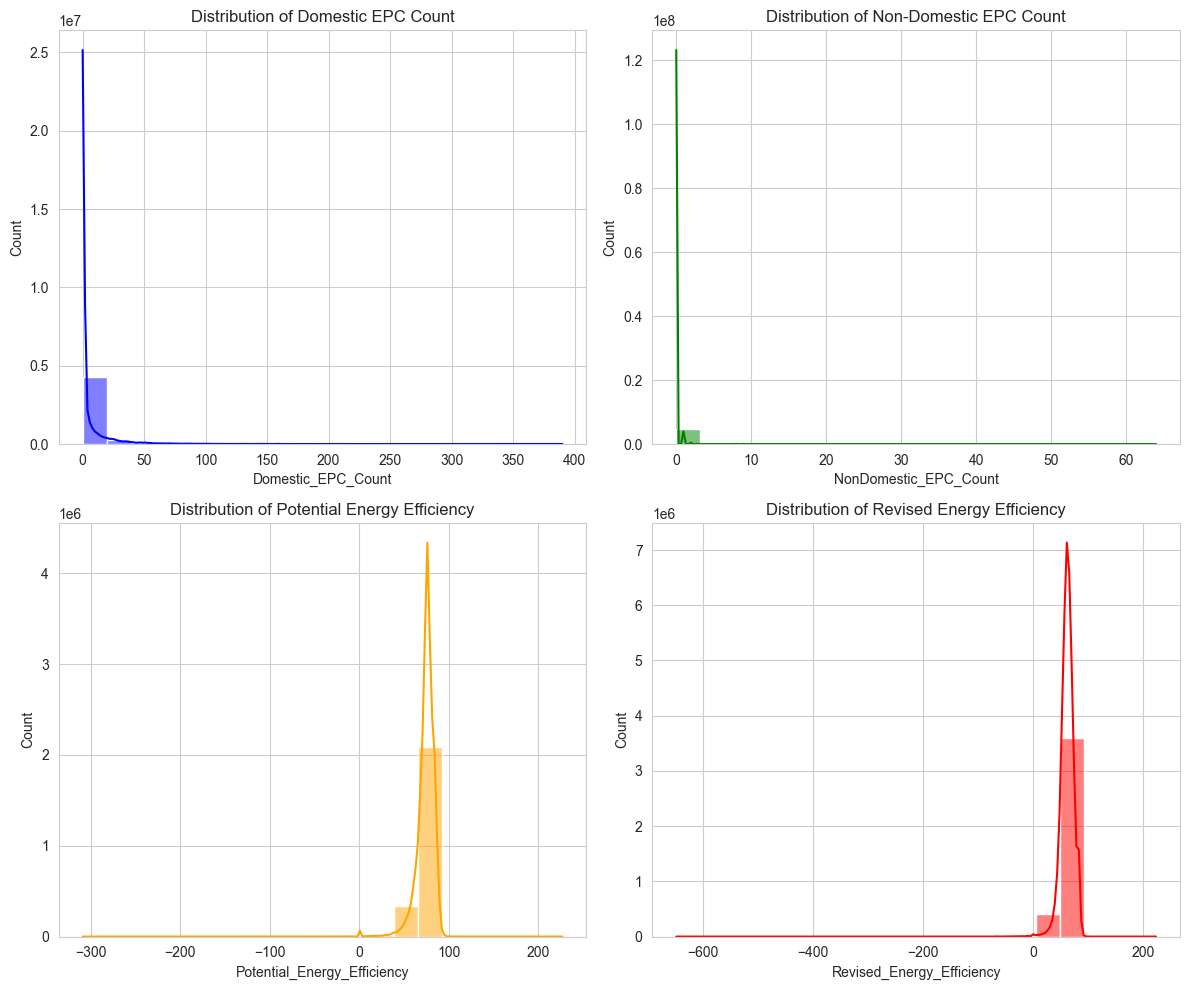

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df_selected['Domestic_EPC_Count'], bins=20, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Domestic EPC Count')

sns.histplot(df_selected['NonDomestic_EPC_Count'], bins=20, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Non-Domestic EPC Count')

sns.histplot(df_selected['Potential_Energy_Efficiency'], bins=20, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Potential Energy Efficiency')

sns.histplot(df_selected['Revised_Energy_Efficiency'], bins=20, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Distribution of Revised Energy Efficiency')

plt.tight_layout()
plt.show()

In [20]:
df_selected['Revised_Energy_Efficiency'].fillna(df_selected['Revised_Energy_Efficiency'].median(), inplace=True)

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_5944/2063945088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Revised_Energy_Efficiency'].fillna(df_selected['Revised_Energy_Efficiency'].median(), inplace=True)


In [24]:
df_selected["Revised_Energy_Efficiency_Rating"].apply(type).value_counts()

Revised_Energy_Efficiency_Rating
<class 'str'>      4008957
<class 'float'>     701986
Name: count, dtype: int64

In [ ]:
columns_to_extract = [
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT", 
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT",
    
    "UPRN", "SCU_ID", "OA", "LSOA", "MSOA", "OAC", 
    "WARD_CODE", "WARD", "ADMINISTRATIVE_AREA"
]

df_RvEPC = df[columns_to_extract].copy()

df_RvEPC.rename(columns={
    "AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT": "Revised_Energy_Efficiency",
    "AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT": "Revised_Energy_Efficiency_Rating",
    "UPRN": "Unique_Property_Reference_Number",
    "SCU_ID": "Statistical_Unit_ID",
    "OA": "Output_Area",
    "LSOA": "Lower_Super_Output_Area",
    "MSOA": "Middle_Super_Output_Area",
    "OAC": "Output_Area_Classification",
    "WARD_CODE": "Ward_Code",
    "WARD": "Ward_Name",
    "ADMINISTRATIVE_AREA": "Administrative_Area"
}, inplace=True)

df_RvEPC.head()

,Revised_Energy_Efficiency,Revised_Energy_Efficiency_Rating,Unique_Property_Reference_Number,Statistical_Unit_ID,Output_Area,Lower_Super_Output_Area,Middle_Super_Output_Area,Output_Area_Classification,Ward_Code,Ward_Name,Administrative_Area
0,54.0,E,95510923,5.030100e+13,E00000010,E01000003,E02000001,2D3,E05009302,Cripplegate,CITY OF LONDON
1,54.0,E,100023615843,5.030100e+13,E00000010,E01000003,E02000001,2D3,E05009302,Cripplegate,CITY OF LONDON
2,63.0,D,200000071748,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON
3,63.0,D,200000071808,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON
4,63.0,D,200000071807,5.030100e+13,E00000012,E01000003,E02000001,3B3,E05009302,Cripplegate,CITY OF LONDON


In [30]:
df_RvEPC["Revised_Energy_Efficiency"].dtype

dtype('float64')

In [31]:
df_RvEPC["Revised_Energy_Efficiency"].unique()

array([  54.,   63.,   nan,   64.,   70.,   72.,   73.,   77.,   59.,
         79.,   50.,   78.,   75.,   57.,   61.,   66.,   68.,   38.,
         47.,   37.,   30.,   19.,   51.,   71.,   32.,   58.,   40.,
         25.,   52.,   46.,   36.,   28.,   67.,   39.,  -18.,    9.,
         26.,   49.,   29.,   27.,   11.,   21.,   62.,   65.,   22.,
         56.,   15.,   20.,   34.,   60.,   14.,   76.,   48.,   53.,
         55.,   87.,   82.,   69.,   44.,   81.,   45.,   74.,   42.,
         41.,   43.,   85.,   35.,   84.,    6.,  -25.,   24.,   -7.,
         80.,   83.,  -32.,   -1.,  -19.,   18.,    3.,  -21.,  -57.,
        -92.,   16.,   88.,    1.,   -8., -280., -447., -233.,   89.,
         33.,   -6.,   12.,   -4.,  -44.,  -42.,    0.,  -83.,  -29.,
         31.,   23.,   -3.,    5.,    7.,   17.,  -38., -237.,   -2.,
         10.,  -30.,  -47.,   86.,    2.,  -52.,  -50., -108.,  -65.,
         95.,   93.,   91.,   90.,   13.,    8.,  -20.,  -24.,  -31.,
        -40.,  -27.,

In [32]:
df_RvEPC["Revised_Energy_Efficiency_Rating"].unique()

array(['E', 'D', nan, 'C', 'F', 'G', 'B', 'A'], dtype=object)

In [33]:
df_RvEPC["Revised_Energy_Efficiency_Rating"].value_counts()

Revised_Energy_Efficiency_Rating
D    2056349
C     908713
E     744077
B     199296
F      75157
G      23767
A       1598
Name: count, dtype: int64

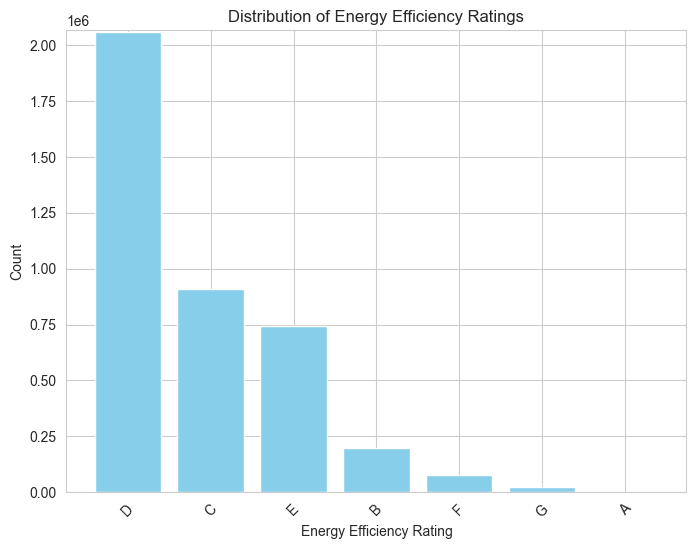

In [39]:
import matplotlib.pyplot as plt

ratings = ['D', 'C', 'E', 'B', 'F', 'G', 'A']
counts = [2056349, 908713, 744077, 199296, 75157, 23767, 1598]

plt.figure(figsize=(8,6))
plt.bar(ratings, counts, color='skyblue')

plt.xlabel('Energy Efficiency Rating')
plt.ylabel('Count')
plt.title('Distribution of Energy Efficiency Ratings')

plt.ylim(0, max(counts) + 10000) 

plt.xticks(rotation=45)


plt.show()

In [40]:
nan_count = df_RvEPC["Revised_Energy_Efficiency_Rating"].isna().sum()
print(f"Number of NaN values: {nan_count}")

Number of NaN values: 701986


In [41]:
df_RvEPC_cleaned = df_RvEPC.dropna(subset=["Revised_Energy_Efficiency_Rating"])

In [42]:
df_RvEPC_cleaned["Revised_Energy_Efficiency_Rating"].unique()

array(['E', 'D', 'C', 'F', 'G', 'B', 'A'], dtype=object)

In [43]:
df_RvEPC_cleaned.to_csv("Revised_Energy_Efficiency_Cleaned.csv", index=False)

In [44]:
df_RvEPC_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008957 entries, 0 to 4199333
Data columns (total 11 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Revised_Energy_Efficiency         float64
 1   Revised_Energy_Efficiency_Rating  object 
 2   Unique_Property_Reference_Number  int64  
 3   Statistical_Unit_ID               float64
 4   Output_Area                       object 
 5   Lower_Super_Output_Area           object 
 6   Middle_Super_Output_Area          object 
 7   Output_Area_Classification        object 
 8   Ward_Code                         object 
 9   Ward_Name                         object 
 10  Administrative_Area               object 
dtypes: float64(2), int64(1), object(8)
memory usage: 367.0+ MB


In [46]:

df_RvEPC_cleaned = df_RvEPC_cleaned[['Revised_Energy_Efficiency_Rating', 'Lower_Super_Output_Area']]


print(df_RvEPC_cleaned.head())  # Preview the cleaned DataFrame

  Revised_Energy_Efficiency_Rating Lower_Super_Output_Area
0                                E               E01000003
1                                E               E01000003
2                                D               E01000003
3                                D               E01000003
4                                D               E01000003


In [47]:
df_RvEPC_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008957 entries, 0 to 4199333
Data columns (total 2 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Revised_Energy_Efficiency_Rating  object
 1   Lower_Super_Output_Area           object
dtypes: object(2)
memory usage: 91.8+ MB


In [ ]:

df_grouped = df_RvEPC_cleaned.groupby('Lower_Super_Output_Area', as_index=False).agg({
    'Revised_Energy_Efficiency_Rating': lambda x: x.mode()[0],  # Get most frequent value
    'Lower_Super_Output_Area': 'first'  # Keep the LSOA itself
})

print(df_grouped.head())

  Revised_Energy_Efficiency_Rating Lower_Super_Output_Area
0                                D               E01000001
1                                D               E01000002
2                                D               E01000003
3                                C               E01000005
4                                D               E01000006


In [ ]:
df_grouped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Revised_Energy_Efficiency_Rating  4857 non-null   object
 1   Lower_Super_Output_Area           4857 non-null   object
dtypes: object(2)
memory usage: 76.0+ KB


In [50]:
df_grouped.to_csv("rvEPC_and_LSOA.csv", index=False)

In [ ]:
import geopandas as gpd
import os


folder_path = "/Users/shakthimaha/Downloads/Dataset/2011_london_boundaries/LSOA_2011_BGC_London"


shapefiles = [f for f in os.listdir(folder_path) if f.endswith(".shp")]

gdfs = [gpd.read_file(os.path.join(folder_path, shp)) for shp in shapefiles]
merged_gdf = gpd.pd.concat(gdfs, ignore_index=True)

print(merged_gdf.head())
print(merged_gdf.columns)

    LSOA11CD     LSOA11NM   MSOA11CD    MSOA11NM    LAD11CD LAD11NM  \
0  E01004076  Sutton 011A  E02000850  Sutton 011  E09000029  Sutton   
1  E01004077  Sutton 011B  E02000850  Sutton 011  E09000029  Sutton   
2  E01004078  Sutton 011C  E02000850  Sutton 011  E09000029  Sutton   
3  E01004079  Sutton 011D  E02000850  Sutton 011  E09000029  Sutton   
4  E01004080  Sutton 011E  E02000850  Sutton 011  E09000029  Sutton   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      1487      1487          0     4.3     616   
1  E12000007  London      1560      1558          2    59.1     629   
2  E12000007  London      1617      1617          0    50.1     686   
3  E12000007  London      1399      1399          0    43.7     489   
4  E12000007  London      1332      1326          6    45.1     506   

   AVHHOLDSZ                                           geometry  
0        2.4  POLYGON ((529979.688 167267.094, 530194.764 16...  
1        2.5  

In [52]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LSOA11CD   4835 non-null   object  
 1   LSOA11NM   4835 non-null   object  
 2   MSOA11CD   4835 non-null   object  
 3   MSOA11NM   4835 non-null   object  
 4   LAD11CD    4835 non-null   object  
 5   LAD11NM    4835 non-null   object  
 6   RGN11CD    4835 non-null   object  
 7   RGN11NM    4835 non-null   object  
 8   USUALRES   4835 non-null   int32   
 9   HHOLDRES   4835 non-null   int32   
 10  COMESTRES  4835 non-null   int32   
 11  POPDEN     4835 non-null   float64 
 12  HHOLDS     4835 non-null   int32   
 13  AVHHOLDSZ  4835 non-null   float64 
 14  geometry   4835 non-null   geometry
dtypes: float64(2), geometry(1), int32(4), object(8)
memory usage: 491.2+ KB


In [57]:
print(merged_gdf.columns)  # List column names
print(merged_gdf.head())   # Check first few rows

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry'],
      dtype='object')
    LSOA11CD     LSOA11NM   MSOA11CD    MSOA11NM    LAD11CD LAD11NM  \
0  E01004076  Sutton 011A  E02000850  Sutton 011  E09000029  Sutton   
1  E01004077  Sutton 011B  E02000850  Sutton 011  E09000029  Sutton   
2  E01004078  Sutton 011C  E02000850  Sutton 011  E09000029  Sutton   
3  E01004079  Sutton 011D  E02000850  Sutton 011  E09000029  Sutton   
4  E01004080  Sutton 011E  E02000850  Sutton 011  E09000029  Sutton   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      1487      1487          0     4.3     616   
1  E12000007  London      1560      1558          2    59.1     629   
2  E12000007  London      1617      1617          0    50.1     686   
3  E12000007  London      1399      1399          0    43.7     489   


In [58]:
print(merged_gdf["LSOA11CD"].head())  # From shapefile
print(df_grouped["Lower_Super_Output_Area"].head())  # From CSV/Excel

0    E01004076
1    E01004077
2    E01004078
3    E01004079
4    E01004080
Name: LSOA11CD, dtype: object
0    E01000001
1    E01000002
2    E01000003
3    E01000005
4    E01000006
Name: Lower_Super_Output_Area, dtype: object


In [59]:
matching_count = merged_gdf["LSOA11CD"].isin(df_grouped["Lower_Super_Output_Area"]).sum()
print(f"Matching LSOA codes: {matching_count}/{len(df_grouped)}")

Matching LSOA codes: 4835/4857


In [60]:
missing_lsoas = df_grouped[~df_grouped["Lower_Super_Output_Area"].isin(merged_gdf["LSOA11CD"])]
print(missing_lsoas)

     Revised_Energy_Efficiency_Rating Lower_Super_Output_Area
4642                                D               E01015971
4643                                D               E01021744
4644                                D               E01021752
4645                                B               E01023548
4646                                E               E01023839
4647                                D               E01023840
4648                                D               E01023849
4649                                F               E01024151
4650                                D               E01024153
4651                                D               E01024421
4652                                E               E01024439
4653                                E               E01024440
4654                                F               E01028671
4655                                D               E01030323
4656                                D               E01030389
4657    

In [61]:
missing_in_shapefile = merged_gdf[merged_gdf["LSOA11CD"].isin(missing_lsoas["Lower_Super_Output_Area"])]
print(missing_in_shapefile)

Empty GeoDataFrame
Columns: [LSOA11CD, LSOA11NM, MSOA11CD, MSOA11NM, LAD11CD, LAD11NM, RGN11CD, RGN11NM, USUALRES, HHOLDRES, COMESTRES, POPDEN, HHOLDS, AVHHOLDSZ, geometry]
Index: []


In [62]:
df_grouped["Lower_Super_Output_Area"] = df_grouped["Lower_Super_Output_Area"].str.strip()
merged_gdf["LSOA11CD"] = merged_gdf["LSOA11CD"].str.strip()

In [63]:
df_grouped = df_grouped[df_grouped["Lower_Super_Output_Area"].isin(merged_gdf["LSOA11CD"])]

In [64]:
merged_gdf = merged_gdf.merge(
    df_grouped, 
    left_on="LSOA11CD", 
    right_on="Lower_Super_Output_Area", 
    how="left"
)

In [ ]:
# Define mapping for categorical ratings
rating_map = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7
}

# Apply mapping to the dataset
merged_gdf["Rating_Numeric"] = merged_gdf["Revised_Energy_Efficiency_Rating"].map(rating_map)

In [69]:
# Convert Rating_Numeric to numeric (force conversion and handle errors)
merged_gdf["Rating_Numeric"] = pd.to_numeric(merged_gdf["Rating_Numeric"], errors="coerce")

# Replace NaN values with a default number (e.g., 0 or another placeholder)
merged_gdf["Rating_Numeric"].fillna(0, inplace=True)

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_5944/4149561873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_gdf["Rating_Numeric"].fillna(0, inplace=True)


In [70]:
folium.Choropleth(
    geo_data=geojson_data,
    name="Energy Efficiency",
    data=merged_gdf,
    columns=["LSOA11CD", "Rating_Numeric"],  # Using the numeric column
    key_on="feature.properties.LSOA11CD",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Energy Efficiency Rating"
).add_to(m)

# Save or display the map
m.save("energy_efficiency_map.html")

In [71]:
import folium

# Create a map centered on London
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='CartoDB positron')  # CartoDB positron for white background

In [72]:
# Function to style GeoJSON features
def style_function(feature):
    return {
        'fillColor': 'blue',  # Color of the areas
        'color': 'black',     # Border color
        'weight': 1,          # Border thickness
        'fillOpacity': 0.6    # Opacity of the area fill
    }

# Add GeoJSON to the map with the custom style
folium.GeoJson(
    geojson_data,  # The merged GeoJSON data
    name="Energy Efficiency Areas",
    style_function=style_function
).add_to(m)

In [73]:
# Style function based on energy rating
def style_function(feature):
    rating = feature['properties']['Rating_Numeric']  # Get the rating from the feature
    color = 'green' if rating > 4 else ('yellow' if rating > 2 else 'red')
    
    return {
        'fillColor': color,  # Color based on the rating
        'color': 'black',     # Border color
        'weight': 1,          # Border thickness
        'fillOpacity': 0.7    # Opacity of the fill
    }

# Add styled GeoJSON to the map
folium.GeoJson(
    geojson_data,
    name="Energy Efficiency Areas",
    style_function=style_function
).add_to(m)

In [74]:
# Style function based on energy rating
def style_function(feature):
    rating = feature['properties']['Rating_Numeric']  # Get the rating from the feature
    color = 'green' if rating > 4 else ('yellow' if rating > 2 else 'red')
    
    return {
        'fillColor': color,  # Color based on the rating
        'color': 'black',     # Border color
        'weight': 1,          # Border thickness
        'fillOpacity': 0.7    # Opacity of the fill
    }

# Add styled GeoJSON to the map
folium.GeoJson(
    geojson_data,
    name="Energy Efficiency Areas",
    style_function=style_function
).add_to(m)

In [75]:
# Save or display the map
m.save("focused_energy_efficiency_map.html")